In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#generate and filter the data
data = pd.read_csv('new_data.csv')
data['Sex'] = data['Sex'].replace('M',1)
data['Sex'] = data['Sex'].replace('F',0)
data['Side'] = data['Side'].replace('L',0)
data['Side'] = data['Side'].replace('R',1)
X = data[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS']]
X = X.dropna(axis=0)

In [3]:
#separate X,y
X1 = X[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort']]
y = X[['LOS']]

In [4]:
#Train data with 80-20
#However, if a fixed value is assigned like random_state = 
#42 then no matter how many times you execute your code the result 
#would be the same .i.e, same values in train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2)

#Use Linear regression from sklearn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predict_data = linreg.predict(X_test)

#produce the r2_score of the model
from sklearn.metrics import r2_score
r2_score(y_test,predict_data)

-0.005823349661055133

mean value of r2 is  -0.16747849714289967
best value of r2 is 0.22501280013998537
worst value of r2 is -2.3164968925897944


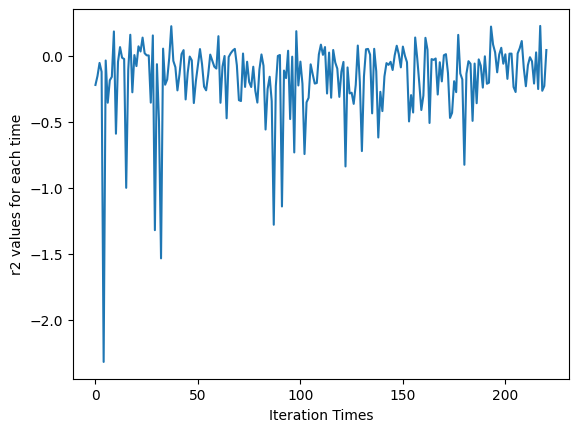

In [7]:
r2 = []
linreg_model = []
for i in range(221):
    X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2)
    linreg_i = LinearRegression()
    linreg_i.fit(X_train, y_train)
    predict_data = linreg_i.predict(X_test)
    y_test = np.array(y_test)
    linreg_model.append(linreg_i)
    r2.append(r2_score(y_test,predict_data))
    
plt.plot(np.arange(221),r2);
plt.xlabel("Iteration Times")
plt.ylabel("r2 values for each time")
print("mean value of r2 is ",np.mean(r2))
best_r2 = np.amax(r2)
worst_r2 = np.amin(r2)
print("best value of r2 is",best_r2)
#print(f"best gradient is,{best_model.coef_}, best intercept is {best_model.intercept_}")
print("worst value of r2 is",worst_r2)

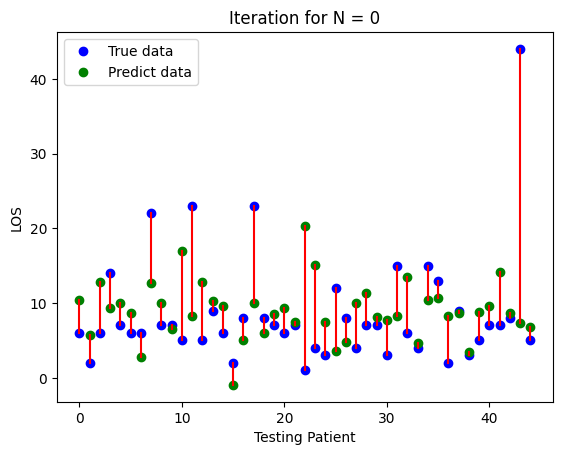

best r2 is -0.27082297609206707
gradient of the model is [[ 0.05047536  2.51047327  0.32596527 -0.25642117  0.05884223  0.3324725
   0.01513633 -0.51950036  0.55949707 -0.07666464  0.03343903  0.00806309
  -2.3086043  -3.10094678 -0.24104711]]
y-intercept of the model is [-2.42065756]
MAE of the model is 5.573068306070716
MSE of the model is 69.44906361790247
Median AE of the model is 3.7777206987292917


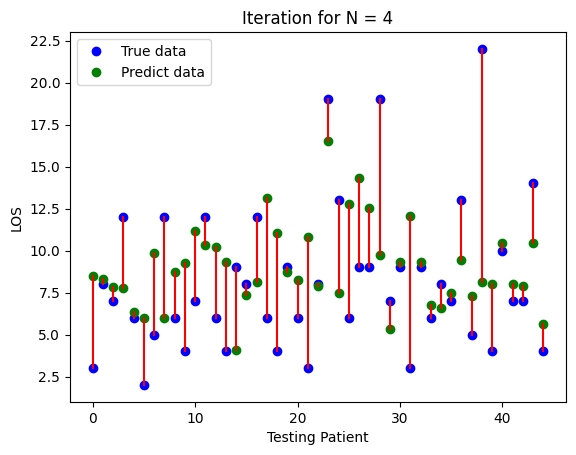

best r2 is -0.15818186378761134
gradient of the model is [[-1.60694188e-02  3.97710621e+00  2.97500317e-01 -1.21244116e-01
   3.71725910e-02  6.31475942e-01 -8.01120578e-02 -2.47722015e-01
   1.09102388e+00 -4.97835043e-02 -9.49141477e-02 -3.28555087e-03
  -1.62511595e+00 -4.02832252e+00  3.65340680e-03]]
y-intercept of the model is [5.02574574]
MAE of the model is 3.593360167440204
MSE of the model is 21.598804890901413
Median AE of the model is 3.546568115126343


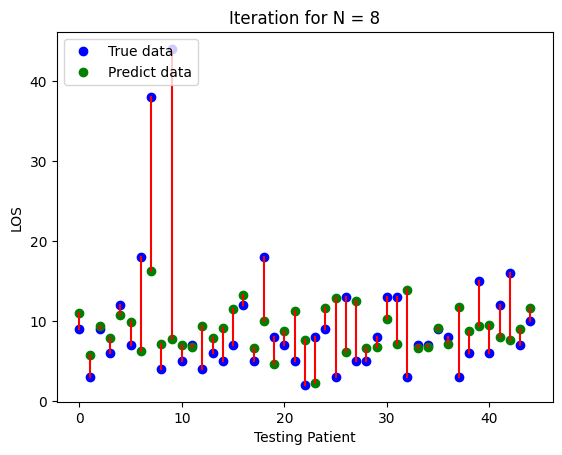

best r2 is -0.008579884425003348
gradient of the model is [[ 0.08275572  2.04288066  0.40113315 -0.11716148 -0.01291599  0.45079139
  -0.04497669 -0.30104994  0.23405116 -0.06012858  0.01452349 -0.01267852
  -1.53031794 -3.67343757  0.03453259]]
y-intercept of the model is [-2.41059778]
MAE of the model is 4.95435901688749
MSE of the model is 62.42536710829247
Median AE of the model is 2.918177679894052


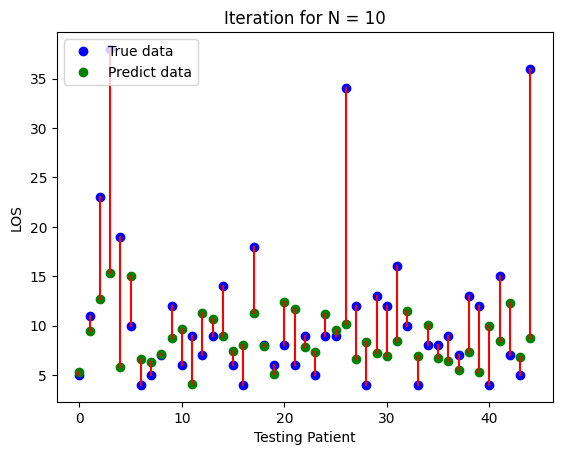

best r2 is 0.02743906235492244
gradient of the model is [[ 0.04971585  3.71278209  0.24224453 -0.23496074  0.03481156  0.38702041
  -0.05766532 -0.2129858   0.34864464 -0.02178037 -0.03466432 -0.02523547
  -1.10414252 -3.14489506 -0.16192022]]
y-intercept of the model is [4.65991106]
MAE of the model is 5.1626267630993805
MSE of the model is 60.88183441957562
Median AE of the model is 4.043534206121905


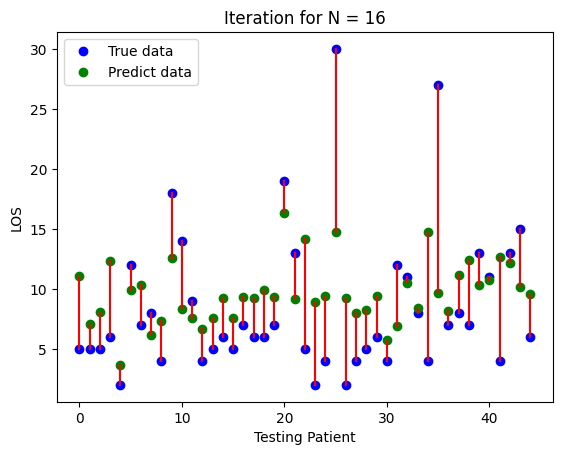

best r2 is 0.13329606038160358
gradient of the model is [[-1.28332751e-02  3.42045876e+00  2.07338307e-01 -2.03799678e-01
   9.83656028e-02  3.23943961e-01 -3.01379412e-04 -2.18551119e-01
   4.17077489e-01 -4.57214430e-02 -1.41189582e-02 -1.20882133e-02
  -1.67074791e+00 -3.12632788e+00 -3.73487638e-02]]
y-intercept of the model is [4.46334981]
MAE of the model is 4.286866655997843
MSE of the model is 30.415530254341583
Median AE of the model is 3.2566304704397258


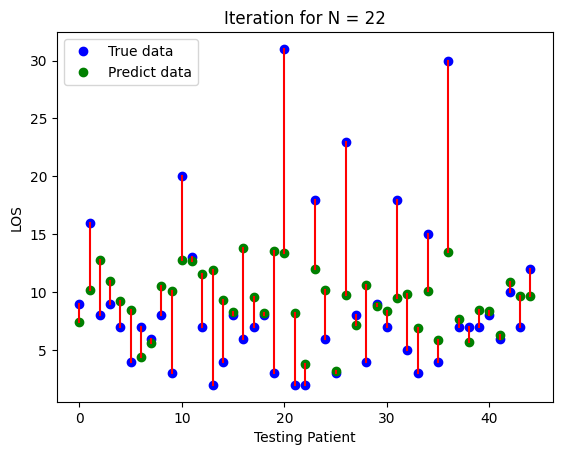

best r2 is 0.20729473831170553
gradient of the model is [[-0.00741417  4.07388019  0.15551116 -0.13969539  0.057718    0.27846957
  -0.00616809 -0.27260565  0.77248221 -0.0443444  -0.05084762 -0.00648812
  -1.27659869 -3.37517195 -0.23681427]]
y-intercept of the model is [6.45474323]
MAE of the model is 4.243531765086177
MSE of the model is 35.229779126370246
Median AE of the model is 2.5993688315347008


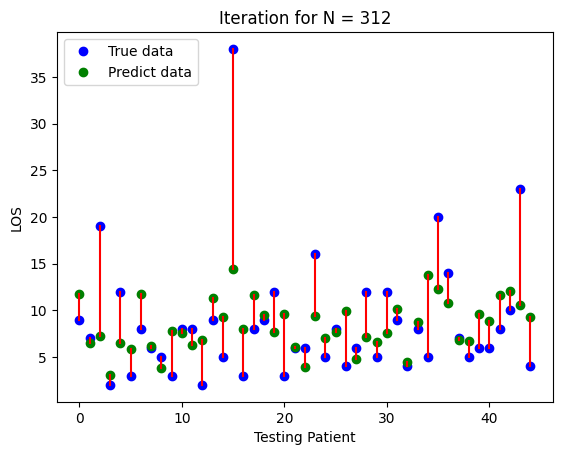

best r2 is 0.2193128295383141
gradient of the model is [[-0.01392252  3.81282084  0.31695811 -0.15161339  0.03084614  0.52338107
  -0.07248753 -0.36803021  0.5642469  -0.0416574  -0.04655812  0.01958593
  -1.78886181 -3.25472324 -0.1765715 ]]
y-intercept of the model is [6.83211077]
MAE of the model is 3.8774646917840907
MSE of the model is 32.000849022885276
Median AE of the model is 2.8487265139363256


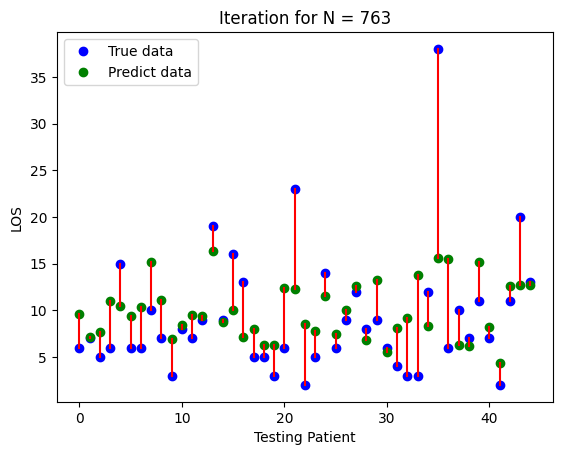

best r2 is 0.2613558897104449
gradient of the model is [[-5.58763516e-02  4.18425589e+00  2.17375204e-01 -3.03132465e-02
   5.49599406e-02  2.88431569e-01 -2.34718083e-02 -2.84572455e-01
   6.10449583e-01 -4.60787355e-02 -3.82898939e-02  3.99610466e-03
  -1.70727156e+00 -3.26981171e+00 -1.18744549e-01]]
y-intercept of the model is [9.13351105]
MAE of the model is 3.96867282440167
MSE of the model is 30.39784966671129
Median AE of the model is 3.4134340729641153


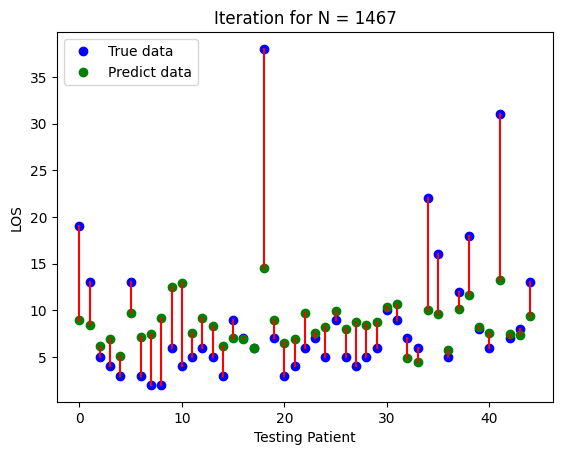

best r2 is 0.29516940576632344
gradient of the model is [[-0.04315859  3.2809467   0.23369375 -0.08148273  0.00910525  0.37185242
  -0.04104248 -0.22746254  0.80836187 -0.04086988 -0.05577454  0.00449703
  -1.36644607 -2.29422119 -0.02997419]]
y-intercept of the model is [7.48755814]
MAE of the model is 4.05569241328298
MSE of the model is 36.294772861388076
Median AE of the model is 3.0194925711064506


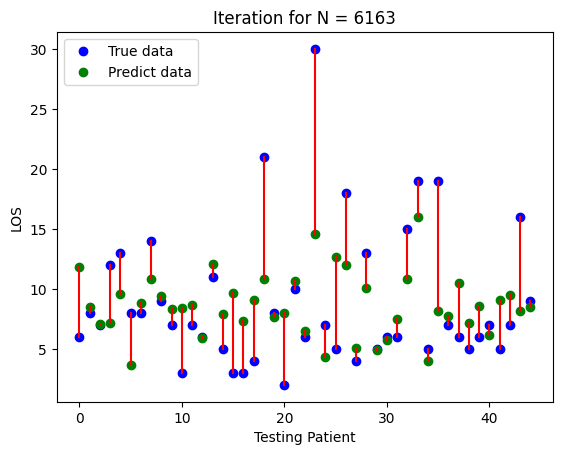

best r2 is 0.30520212085751686
gradient of the model is [[ 0.02165759  3.35634875  0.27934394 -0.11404203  0.01338475  0.45350688
  -0.05399255 -0.24763754  0.32594368 -0.04113272 -0.02900654 -0.01639944
  -1.35742486 -3.35789463 -0.00511547]]
y-intercept of the model is [5.61971897]
MAE of the model is 3.3768883130908662
MSE of the model is 21.919243314142413
Median AE of the model is 2.6985130164494455


In [22]:
#plot the true LOS and predict LOS to see the difference(10 samples)
temp = -1
for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2)
    linreg_i = LinearRegression()
    linreg_i.fit(X_train, y_train)
    predict_data = linreg_i.predict(X_test)
    y_test = np.array(y_test)
    r2 = r2_score(y_test,predict_data)
    if(r2 > temp):
        plt.plot(np.arange(45),y_test, 'bo',label='True data')
        plt.plot(np.arange(45), predict_data, 'go',label='Predict data')
        for j in range(45):
            plt.plot((j,j),(y_test[j],predict_data[j]),'r-')
        plt.title(f"Iteration for N = {i}")
        plt.xlabel("Testing Patient")
        plt.ylabel("LOS")
        plt.savefig(f"difference_{i}.png")
        plt.legend(loc="upper left")
        plt.show()
        plt.close()
        temp = r2
        print(f"best r2 is {r2}")
        print(f"gradient of the model is {linreg_i.coef_}")
        print(f"y-intercept of the model is {linreg_i.intercept_}")
        print(f"MAE of the model is {mean_absolute_error(y_test,predict_data)}")
        print(f"MSE of the model is {mean_squared_error(y_test,predict_data)}")
        print(f"Median AE of the model is {median_absolute_error(y_test,predict_data)}")

In [23]:
loo = LeaveOneOut()
lg = LinearRegression()
y = np.array(y)
X1 = np.array(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lg.fit(X_train,y_train)
    predict_data = lg.predict(X_test)
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

In [24]:
print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")

Leave one out validation
MAE of the model is 5.135661736283378
MSE of the model is 80.78912831541813
Median absolute error of the model is 3.4795368050276956


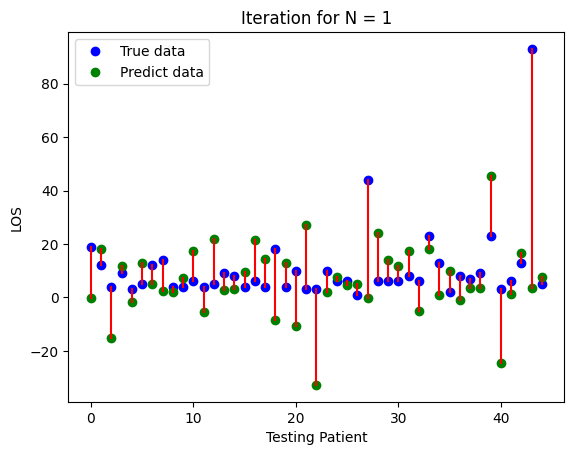

best r2 is -0.8507067358797653
MAE of the model is 12.990330459162957
MSE of the model is 386.31241136590694
Median AE of the model is 7.923559633026912


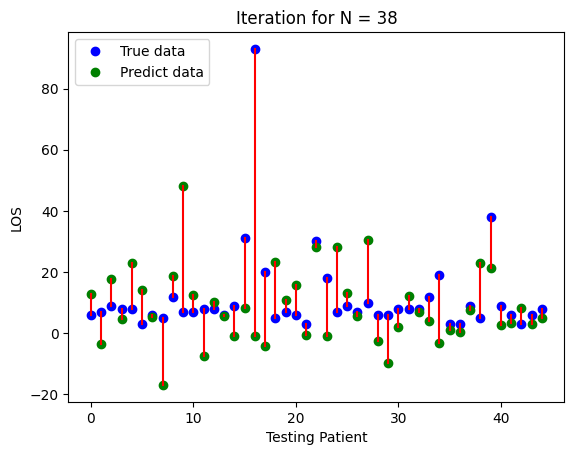

best r2 is -0.7847319717604679
MAE of the model is 11.767509278588573
MSE of the model is 365.6946657356464
Median AE of the model is 6.903821382138517


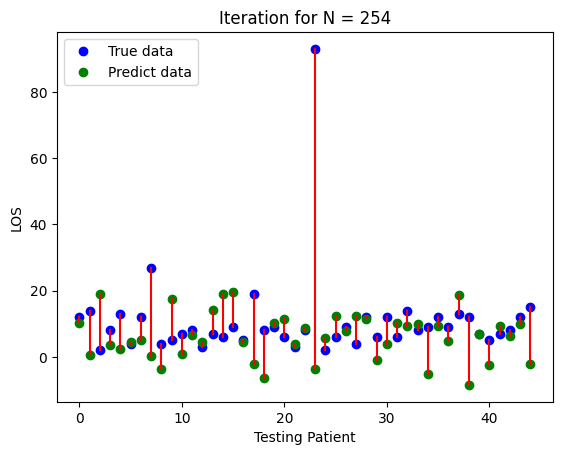

best r2 is -0.6858212572487172
MAE of the model is 9.012382415388279
MSE of the model is 295.80543660524154
Median AE of the model is 5.6441352191102965


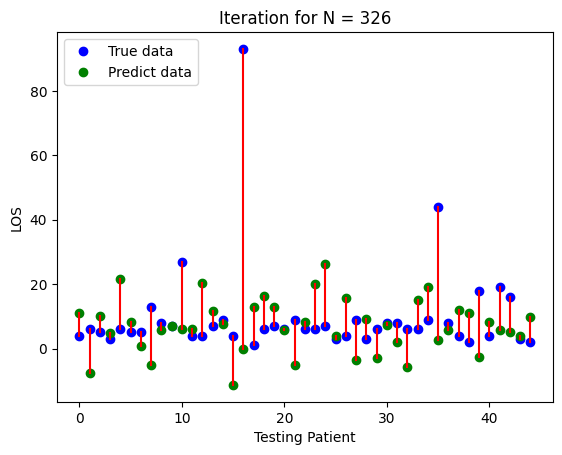

best r2 is -0.587890815362321
MAE of the model is 11.083251831253138
MSE of the model is 333.5903756402167
Median AE of the model is 8.867368862701198


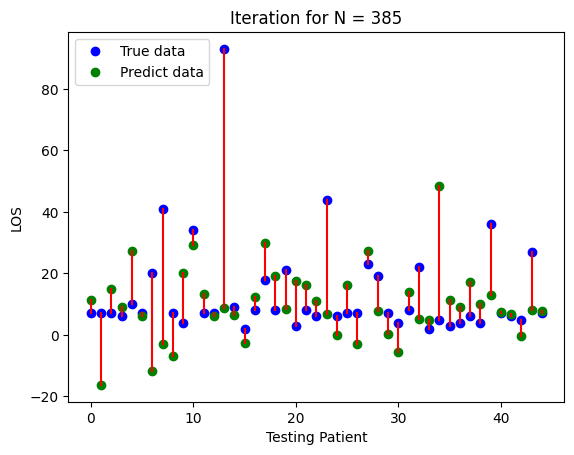

best r2 is -0.5388813544766431
MAE of the model is 12.791652959545075
MSE of the model is 388.4014948073507
Median AE of the model is 8.219505871245474


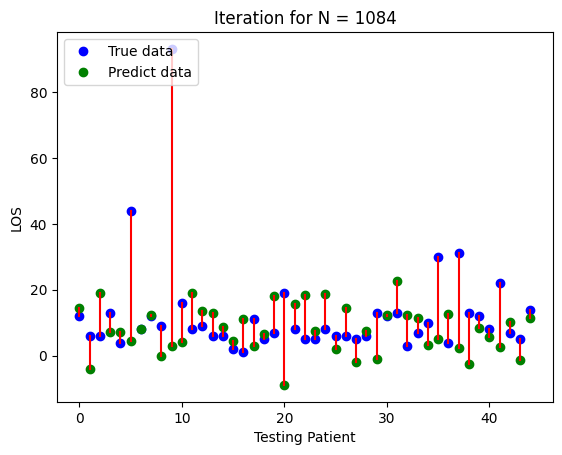

best r2 is -0.529724649885678
MAE of the model is 10.812946511245643
MSE of the model is 324.49803486661324
Median AE of the model is 7.763365039735106


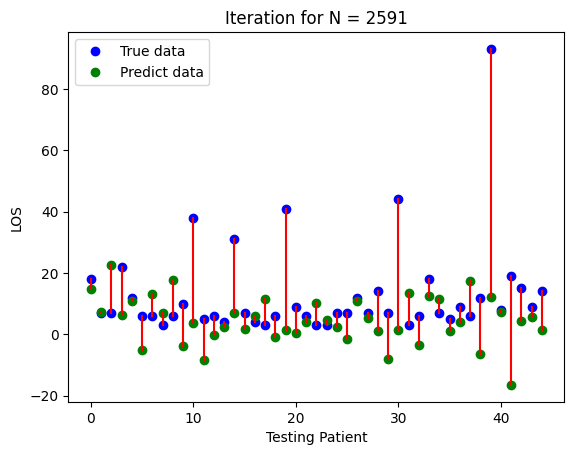

best r2 is -0.47518949196816607
MAE of the model is 12.068735533327628
MSE of the model is 354.76668182398873
Median AE of the model is 8.403642459227285


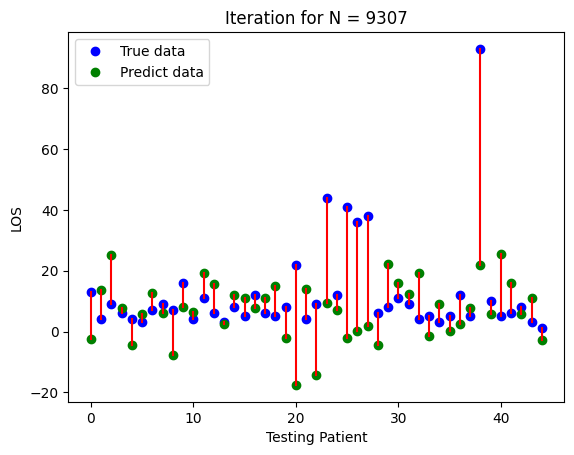

best r2 is -0.41178897386432634
MAE of the model is 12.685443688870825
MSE of the model is 351.0397596969494
Median AE of the model is 8.266223676485858


In [13]:
temp = -1
for i in range(10000):
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    poly_x_train = poly_features.fit_transform(X_train)
    poly_x_test = poly_features.fit_transform(X_test)
    linear = LinearRegression()
    model = linear.fit(poly_x_train,y_train)
    y_pred = model.predict(poly_x_test)
    r2 = r2_score(y_test,y_pred)
    if(r2 > temp):
        x_poly = np.arange(y_test.shape[0])
        plt.plot(np.arange(45),y_test, 'bo',label='True data')
        plt.plot(np.arange(45), y_pred, 'go',label='Predict data')
        for j in range(45):
            plt.plot((j,j),(y_test[j],y_pred[j]),'r-')
        plt.title(f"Iteration for N = {i}")
        plt.xlabel("Testing Patient")
        plt.ylabel("LOS")
        plt.savefig(f"difference_{i}.png")
        plt.legend(loc="upper left")
        plt.show()
        plt.close()
        temp = r2
        print(f"best r2 is {r2}")
        print(f"MAE of the model is {mean_absolute_error(y_test,y_pred)}")
        print(f"MSE of the model is {mean_squared_error(y_test,y_pred)}")
        print(f"Median AE of the model is {median_absolute_error(y_test,y_pred)}")

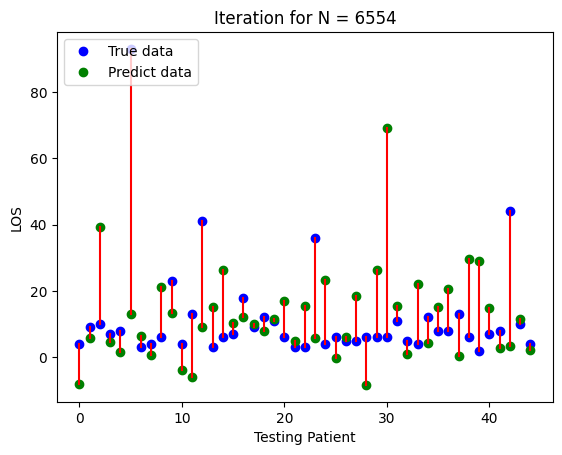

best r2 is -0.9010498130492244
MAE of the model is 14.175655049883764
MSE of the model is 446.1637174572327
Median AE of the model is 9.528665598432166


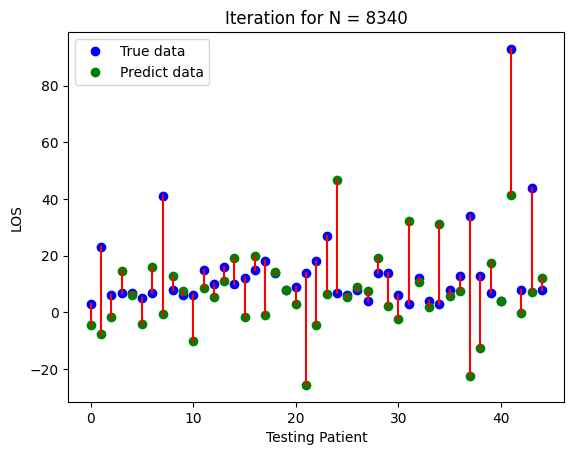

best r2 is -0.7871295599809216
MAE of the model is 13.79069773814381
MSE of the model is 402.96991598254255
Median AE of the model is 7.796163028241008


In [14]:
temp = -1
for i in range(10000):
    poly_features = PolynomialFeatures(degree=3, include_bias=False)
    X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    poly_x_train = poly_features.fit_transform(X_train)
    poly_x_test = poly_features.fit_transform(X_test)
    linear = LinearRegression()
    model = linear.fit(poly_x_train,y_train)
    y_pred = model.predict(poly_x_test)
    r2 = r2_score(y_test,y_pred)
    if(r2 > temp):
        x_poly = np.arange(y_test.shape[0])
        plt.plot(np.arange(45),y_test, 'bo',label='True data')
        plt.plot(np.arange(45), y_pred, 'go',label='Predict data')
        for j in range(45):
            plt.plot((j,j),(y_test[j],y_pred[j]),'r-')
        plt.title(f"Iteration for N = {i}")
        plt.xlabel("Testing Patient")
        plt.ylabel("LOS")
        plt.savefig(f"difference_{i}.png")
        plt.legend(loc="upper left")
        plt.show()
        plt.close()
        temp = r2
        print(f"best r2 is {r2}")
        print(f"MAE of the model is {mean_absolute_error(y_test,y_pred)}")
        print(f"MSE of the model is {mean_squared_error(y_test,y_pred)}")
        print(f"Median AE of the model is {median_absolute_error(y_test,y_pred)}")

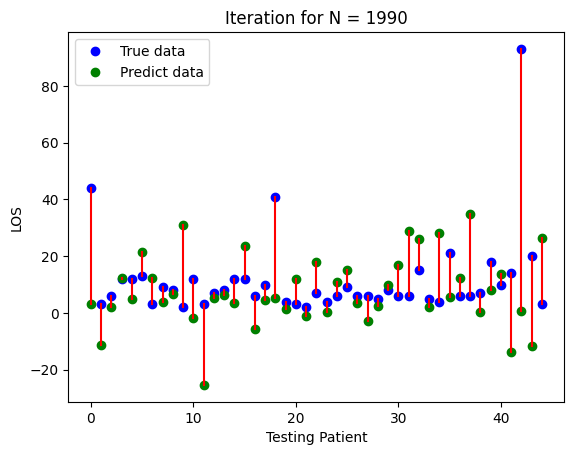

best r2 is -0.9500089837033574
MAE of the model is 13.570277932017724
MSE of the model is 432.3492510949129
Median AE of the model is 8.728159747365602


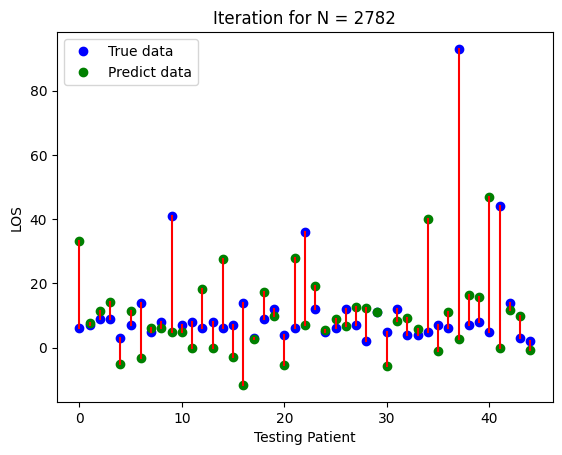

best r2 is -0.8555557299940946
MAE of the model is 12.667569806947721
MSE of the model is 427.0105641482311
Median AE of the model is 7.628474395230144


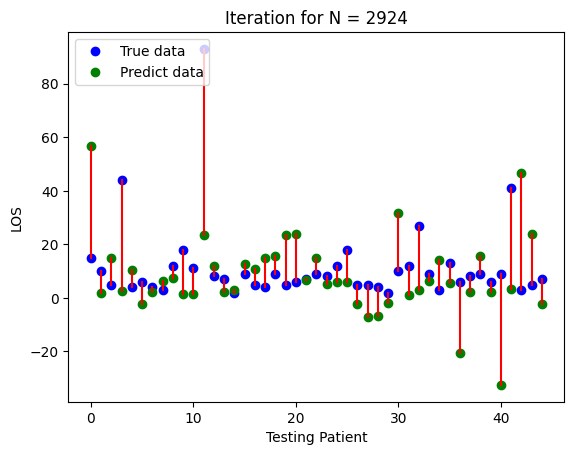

best r2 is -0.7986628202618449
MAE of the model is 13.939485673387685
MSE of the model is 401.511282281424
Median AE of the model is 8.192929028293165


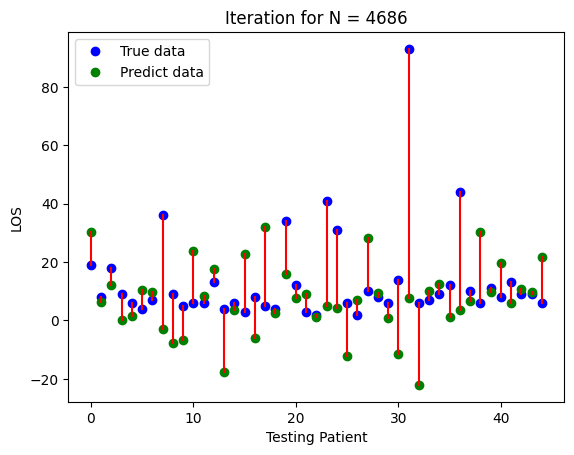

best r2 is -0.7272319958063647
MAE of the model is 13.829862643332334
MSE of the model is 423.3944599853522
Median AE of the model is 8.902058356678028


In [17]:
temp = -1
for i in range(10000):
    poly_features = PolynomialFeatures(degree=4, include_bias=False)
    X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    poly_x_train = poly_features.fit_transform(X_train)
    poly_x_test = poly_features.fit_transform(X_test)
    linear = LinearRegression()
    model = linear.fit(poly_x_train,y_train)
    y_pred = model.predict(poly_x_test)
    r2 = r2_score(y_test,y_pred)
    if(r2 > temp):
        x_poly = np.arange(y_test.shape[0])
        plt.plot(np.arange(45),y_test, 'bo',label='True data')
        plt.plot(np.arange(45), y_pred, 'go',label='Predict data')
        for j in range(45):
            plt.plot((j,j),(y_test[j],y_pred[j]),'r-')
        plt.title(f"Iteration for N = {i}")
        plt.xlabel("Testing Patient")
        plt.ylabel("LOS")
        plt.savefig(f"difference_{i}.png")
        plt.legend(loc="upper left")
        plt.show()
        plt.close()
        temp = r2
        print(f"best r2 is {r2}")
        print(f"MAE of the model is {mean_absolute_error(y_test,y_pred)}")
        print(f"MSE of the model is {mean_squared_error(y_test,y_pred)}")
        print(f"Median AE of the model is {median_absolute_error(y_test,y_pred)}")

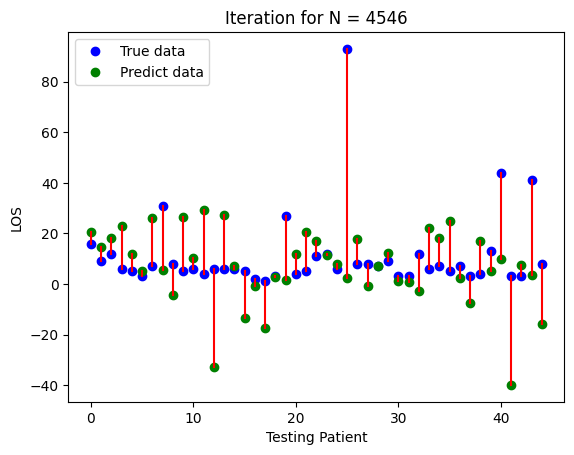

best r2 is -0.982421496508532
MAE of the model is 14.790629414133809
MSE of the model is 468.72863350237
Median AE of the model is 10.397060647992319


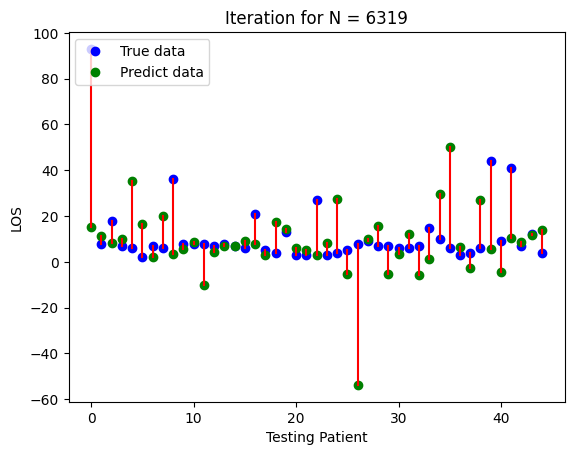

best r2 is -0.9106683024599695
MAE of the model is 13.822785801210744
MSE of the model is 454.3654141841027
Median AE of the model is 9.55315509521356


In [20]:
temp = -1
for i in range(10000):
    poly_features = PolynomialFeatures(degree=5, include_bias=False)
    X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    poly_x_train = poly_features.fit_transform(X_train)
    poly_x_test = poly_features.fit_transform(X_test)
    linear = LinearRegression()
    model = linear.fit(poly_x_train,y_train)
    y_pred = model.predict(poly_x_test)
    r2 = r2_score(y_test,y_pred)
    if(r2 > temp):
        x_poly = np.arange(y_test.shape[0])
        plt.plot(np.arange(45),y_test, 'bo',label='True data')
        plt.plot(np.arange(45), y_pred, 'go',label='Predict data')
        for j in range(45):
            plt.plot((j,j),(y_test[j],y_pred[j]),'r-')
        plt.title(f"Iteration for N = {i}")
        plt.xlabel("Testing Patient")
        plt.ylabel("LOS")
        plt.savefig(f"difference_{i}.png")
        plt.legend(loc="upper left")
        plt.show()
        plt.close()
        temp = r2
        print(f"best r2 is {r2}")
        print(f"MAE of the model is {mean_absolute_error(y_test,y_pred)}")
        print(f"MSE of the model is {mean_squared_error(y_test,y_pred)}")
        print(f"Median AE of the model is {median_absolute_error(y_test,y_pred)}")

In [27]:
loo = LeaveOneOut()
lg = LinearRegression()
y = np.array(y)
X1 = np.array(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
poly_features = PolynomialFeatures(degree=2, include_bias=False)
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    poly_x_train = poly_features.fit_transform(X_train)
    poly_x_test = poly_features.fit_transform(X_test)
    lg.fit(poly_x_train,y_train)
    predict_data = lg.predict(poly_x_test)
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")

Leave one out validation
MAE of the model is 13.056953608973986
MSE of the model is 349.8276065767479
Median absolute error of the model is 9.04290053017155


In [ ]:
loo = LeaveOneOut()
lg1 = LinearRegression()
y = np.array(y)
X1 = np.array(X1)
mean_ab_error = []
mean_sq_error = []
median_error = []
poly_features = PolynomialFeatures(degree=7, include_bias=False)
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    poly_x_train = poly_features.fit_transform(X_train)
    poly_x_test = poly_features.fit_transform(X_test)
    lg1.fit(poly_x_train,y_train)
    predict_data = lg1.predict(poly_x_test)
    mean_ab_error.append(mean_absolute_error(y_test,predict_data))
    mean_sq_error.append(mean_squared_error(y_test,predict_data))
    median_error.append(median_absolute_error(y_test,predict_data))

print("Leave one out validation")
MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
print(f"MAE of the model is {MAE}")
MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
print(f"MSE of the model is {MSE}")
Median = np.median(np.array(median_error))
print(f"Median absolute error of the model is {Median}")